## NLP EMOTION ANALYSIS

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset from the provided file path
file_path = 'nlp_dataset.csv'
data = pd.read_csv(file_path)
df=pd.DataFrame(data)
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [7]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


<Axes: xlabel='Emotion', ylabel='count'>

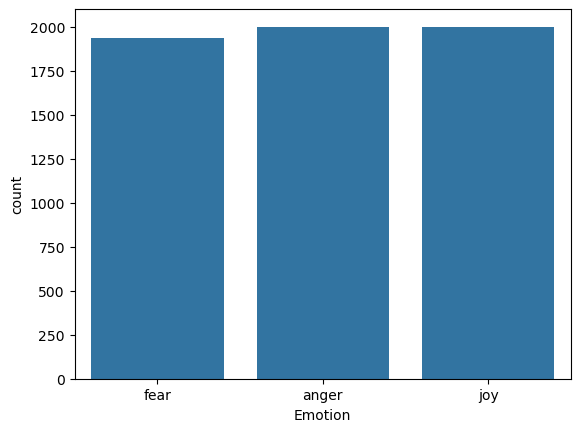

In [12]:
y=df['Emotion']
x=df["Comment"]
counts = df['Emotion'].value_counts()
sns.countplot(x='Emotion', data=df)

In [15]:
counts

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

## Text Preprocessing

Preprocessing text data is crucial in Natural Language Processing (NLP) tasks. Raw text often contains noise, irrelevant information, and inconsistencies that can negatively impact the performance of machine learning models. The preprocessing techniques used in this project are aimed at cleaning and standardizing the text data, which improves the effectiveness of feature extraction and subsequently enhances model performance.

The preprocessing steps will include:

1.Lowercasing

2.Removing punctuation

3.Tokenization

4.Removing stopwords

5.Lemmatization

## Step 1: Lowercasing
Lowercasing the text ensures that words like "Happy" and "happy" are treated as the same word, preventing redundancy in the feature set. Without this step, the model would treat them as separate features, which dilutes the importance of the word across the dataset.

**Impact on model performance:**

Improvement: This technique reduces the number of features (words), allowing models to focus on meaningful patterns rather than case variations.

Without Lowercasing: Duplicate features lead to unnecessary dimensionality, which can increase the training time and reduce the accuracy of the model.

## Step 2: Removing Punctuation
Punctuation generally does not contribute to the meaning of a text in classification problems. Removing punctuation reduces noise and makes the text cleaner for feature extraction.

**Impact on model performance:**

Improvement: Removing punctuation ensures that words are treated as continuous text without unnecessary symbols. This simplifies the vocabulary and improves feature extraction.

Without Punctuation Removal: Punctuation can be treated as separate features by models, leading to uninformative features and decreasing performance.


## Step 3: Tokenization

Tokenization splits the text into individual words (tokens), allowing models to understand each word as a separate feature. This is essential for transforming text into a numerical form that machine learning models can process.

**Impact on model performance:**

Improvement: Tokenization allows the model to assign importance to each individual word, enabling a more granular understanding of the text.

Without Tokenization: Without tokenization, the entire text is treated as a single feature, which would not provide any meaningful patterns to the model.

## Step 4: Removing Stopwords
Stopwords are common words like "the", "is", and "in" that occur frequently but don’t carry significant meaning in most cases. Removing stopwords reduces the feature set to only the most important words, improving model efficiency and performance.

**Impact on model performance:**

Improvement: By eliminating common, irrelevant words, the model focuses on words that carry more meaningful information for classification.

Without Stopword Removal: Including stopwords would add noise to the data, increasing dimensionality without contributing much to model accuracy.


## Step 5: Lemmatization

Lemmatization reduces words to their base form (lemma), such as converting "running" to "run". This helps in standardizing words, ensuring that different forms of the same word are treated as a single feature.

**Impact on model performance:**

Improvement: Lemmatization reduces feature space by grouping different forms of the same word, allowing the model to better understand the core meaning of the text.

Without Lemmatization: Variations of words like "running", "runs", "ran" would be treated as separate features, leading to redundant features and a more complex model.

In [8]:
# Import necessary libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
import string
warnings.filterwarnings('ignore')

# Download necessary NLTK data if not already present
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    return ' '.join(tokens)

# Apply the preprocessing to the 'Comment' column
data['clean_text'] = data['Comment'].apply(preprocess_text)

# Display the cleaned text to verify
data[['Comment', 'clean_text']].head()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Comment,clean_text
0,i seriously hate one subject to death but now ...,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,im full life feel appalled
2,i sit here to write i start to dig out my feel...,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,ive really angry r feel like idiot trusting fi...
4,i feel suspicious if there is no one outside l...,feel suspicious one outside like rapture happe...


**Impact of Preprocessing on Model Performance**
    
Lower Dimensionality: Preprocessing reduces the number of unique words (features) by removing unnecessary characters, making the model more efficient and less prone to overfitting.

Focus on Important Words: By eliminating stopwords and standardizing words through lemmatization, the model learns from the most important and relevant words, improving accuracy.

Better Generalization: Preprocessing ensures that the model focuses on the core meaning of the text, leading to better generalization on unseen data.

## Feature Extraction 
In text classification tasks, machine learning models require numerical input. However, text data is inherently categorical, so we must first transform it into a numerical representation. This is where feature extraction comes in. One popular technique for this is TF-IDF Vectorization (Term Frequency-Inverse Document Frequency).
use **TfidfVectorizer** to convert the cleaned text into numerical features.

TfidfVectorizer converts the text data into a matrix of numerical features, where the weight of each word reflects how important it is within a text sample relative to the entire dataset.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for performance

# Fit and transform the clean text into numerical features
X = vectorizer.fit_transform(data['clean_text'])

# Extract the emotions (target), 
y = data['Emotion']

TfidfVectorizer: This class converts a collection of raw text documents into a matrix of TF-IDF features.

max_features=5000: Limits the number of features (terms) to 5000. This is a common technique to reduce dimensionality and focus on the most important words.

stop_words='english': Removes common stopwords in the English language (like "the", "and", etc.) which are generally less useful for classification.

fit_transform: Fits the vectorizer on the text data and transforms the text into numerical feature vectors.

X: The resulting matrix of size (number of samples, number of features). Each row corresponds to a document (text sample), and each column corresponds to a term's TF-IDF score.

## Model Development

**a) Naive Bayes Classifier**
Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem. It assumes that the features (words in text data) are independent of each other given the class label, which is known as the naive independence assumption.

In text classification, Naive Bayes calculates the likelihood of each word (feature) occurring in each emotion class and multiplies these probabilities to determine which class (emotion) is the most likely.

Naive Bayes is Suitable for Emotion Classification because:
-> Naive Bayes is computationally inexpensive and works well with large datasets, making it a good fit for text classification tasks like emotion detection.

-> Text data, once vectorized using methods like TF-IDF, often results in sparse matrices. Naive Bayes handles this efficiently.

-> Given the typically large number of features (words), Naive Bayes performs well by computing probabilities for each feature independently.

-> Since emotion classification is often a multiclass problem (multiple emotions like happy, sad, angry), Naive Bayes can handle such problems with ease.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9082491582491582
Naive Bayes Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.93      0.91       392
        fear       0.92      0.92      0.92       416
         joy       0.93      0.88      0.90       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



**b) Support Vector Machine (SVM)**
Support Vector Machine (SVM) is a supervised learning algorithm used for classification tasks. SVM aims to find the hyperplane in a high-dimensional space that best separates different classes of data points. For text classification, this means finding a boundary that separates different emotions based on word features.

The goal of SVM is to find a hyperplane that maximizes the margin (the distance between the closest data points of each class, called support vectors). This margin maximization helps in better generalization of the model to new, unseen data.

**Kernel Trick**: SVM can use a kernel trick to project the data into a higher-dimensional space to make the classification problem easier. For emotion classification, the linear kernel is often effective because text data is usually linearly separable after vectorization.

SVM is Suitable for Emotion Classification because:
-> SVM is known for its high classification accuracy, especially in high-dimensional spaces, which is common in text data (large number of features due to words).
-> Handles High-Dimensional Data Well: Text classification problems often involve thousands of features (words), and SVM works well in such cases.
-> Robust to Overfitting: By maximizing the margin between different classes, SVM is less prone to overfitting, especially in scenarios with high-dimensional data.
-> Effective with Sparse Data: Like Naive Bayes, SVM also performs well with sparse data, which is common after text vectorization.


In [15]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9402356902356902
SVM Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.95      0.94       392
        fear       0.97      0.92      0.94       416
         joy       0.93      0.96      0.94       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



## Model Comparison 

In [16]:
# Print accuracy scores for both models
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")

# Print F1-scores for both models
from sklearn.metrics import f1_score
print(f"Naive Bayes F1-Score: {f1_score(y_test, y_pred_nb, average='weighted')}")
print(f"SVM F1-Score: {f1_score(y_test, y_pred_svm, average='weighted')}")


Naive Bayes Accuracy: 0.9082491582491582
SVM Accuracy: 0.9402356902356902
Naive Bayes F1-Score: 0.908214130438681
SVM F1-Score: 0.9402398809099515


**Naive Bayes** is a fast and simple model, performing well for small datasets or when feature independence holds.

**SVM** is more powerful for high-dimensional data like text, often yielding better results when classes are well separated.